In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Instalación e importación de librerias

In [ ]:
!pip uninstall imgaug  && pip uninstall albumentations  && pip install git+https://github.com/aleju/imgaug.git 

Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/imgaug-0.2.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/imgaug/*
Proceed (y/n)? ERROR: Operation cancelled by user


In [ ]:
!pip install pytesseract
!apt install tesseract-ocr
!apt install libtesseract-dev

     |████████████████████████████████| 4.3 MB 5.4 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (3,095 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../tesserac

In [ ]:
import cv2  
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
%matplotlib inline

# OCR

## Combinación de parametros

### Carga de la imagen

### Imagen sin segmentar 

La imagen sin procesar es la siguiente:

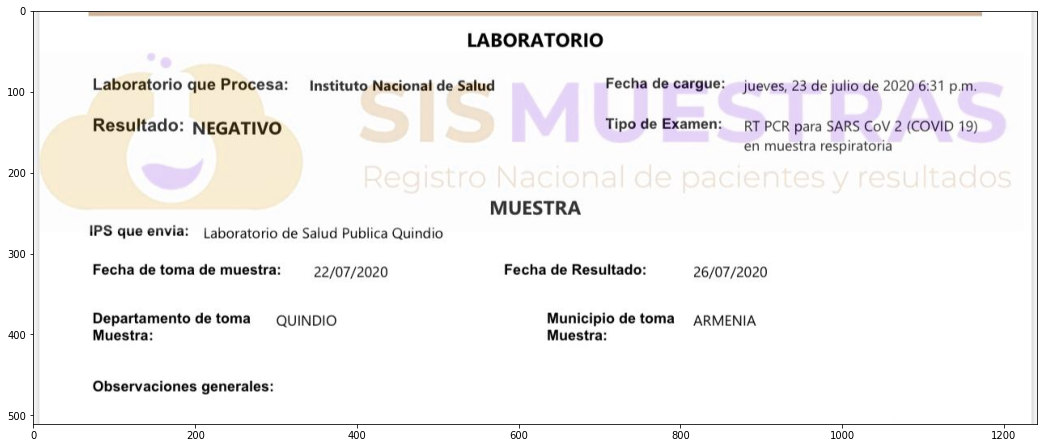

In [ ]:
path = '/content/drive/MyDrive/'
imagen = 'resultado_COVID.jpg'
imagenRecortada = 'Resultado_recortado.jpg'
# Carga del archivo
img = cv2.imread(path+imagen)
fig, ax = plt.subplots(figsize=(18, 18))
plt.imshow(img)


### Resultados de aplicar el algoritmo sin procesar

In [ ]:
print(pytesseract.image_to_string(img, config=custom_config))

LABORATORIO
Laboratorio que Procesa: Instituto Nacional de Salud Fecha de cargue: jueves, 23 de julio de 2020 6:31 p.m.
Resultado: NEGATIVO Tipo de Examen: _ RT PCR para SARS CoV 2 (COVID 19)
en muestra respiratoria
MUESTRA
IPS que envia: Laboratorio de Salud Publica Quindio
Fecha de toma de muestra: 22/07/2020 Fecha de Resultado: 26/07/2020
Departamento de toma = QUINDIO. Municipio de toma ARMENIA
Muestra: Muestra:
Observaciones generales:



Es evidente que el resultado obtenido muestra una presición muy buena sin hacer ningún procesamiento adicional a la imagen, pero para un uso practico no resulta muy útil debido a que la librería detecta las palabras por renglones, entonces en el caso del campo "Departamento de toma muestra" no esta completo y además aparece una línea extra que dice "Muestra: Muestra:" que debería estar con los campos superiores, por otro lado aparecen caracteres que no están presentes en la imagen, como el guion bajo en el "Tipo de Examen: ".

### Resultados después de procesar la imagen

A la imagen se le aplicara un filtro Gaussiano de 5x5 y una umbralización binaria de 180, esto con el fin de eliminar la marca de agua del fondo.

### Filtro gaussiano y umbralización

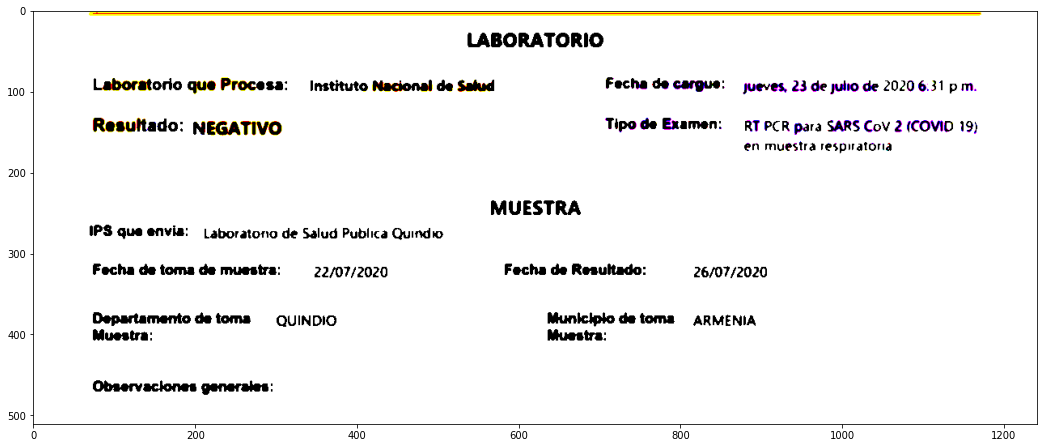

In [ ]:
# Filtrado
img_procesada_1 = cv2.GaussianBlur(img, (5, 5), 0)
# Umbral
img_procesada_1 = cv2.threshold(img_procesada_1, 180, 255,cv2.THRESH_BINARY)[1]

fig, ax = plt.subplots(figsize=(18, 18))
plt.imshow(img_procesada_1)


In [ ]:
print(pytesseract.image_to_string(img_procesada_1, config=custom_config))

LABORATORIO
Laboratorio que Procesa: Instituto Nacional de Salud Fecha decargue: jueves, 23 de julio de 2020 6.31 pm.
Resultado: NEGATIVO Tipo de Examen: — RT PCR para SARS CoV 2 (COVID 19)
en muestra respuatoria
MUESTRA
(PS que envia: Laboratono de Salud Publica Quindio
Fecha de toma de muestra: 22/07/2020 Fecha de Reaultado: 26/07/2020
Departamento de toma = QUINDIO Municipio de toma = ARMENIA
Muestra: Muestra:
Observaciones generaies:



### Umbralización y filtrado Gaussiano

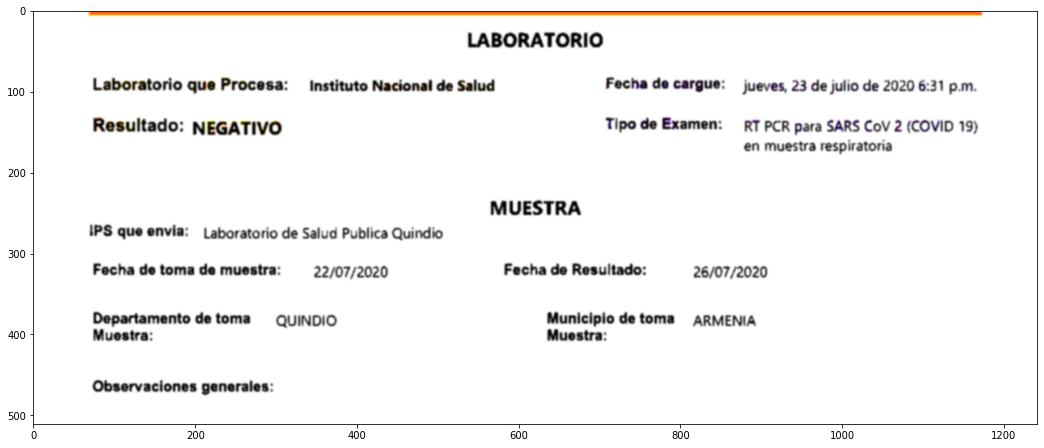

In [ ]:
# Umbral
img_procesada_2 = cv2.threshold(img, 180, 255,cv2.THRESH_BINARY)[1]
# Filtrado
img_procesada_2 = cv2.GaussianBlur(img_procesada_2, (5, 5), 0)


fig, ax = plt.subplots(figsize=(18, 18))
plt.imshow(img_procesada_2)


In [ ]:
print(pytesseract.image_to_string(img_procesada_2, config=custom_config))

LABORATORIO
Laboratorio que Procesa: _ Instituto Nacional de Salud Fecha de cargue: jueves, 23 de julio de 2020 6:31 p.m.
Resultado: NEGATIVO Tipo de Examen: RT PCR para SARS CoV 2 (COVID 19)
en muestra respiratoria
MUESTRA
IPS que envia: Laboratorio de Salud Publica Quindio
Fecha de toma de muestra: 22/07/2020 Fecha de Resultado: 26/07/2020
Departamento de toma QUINDIO Municipio de toma ARMENIA
Muestra: Muestra:
Observaciones generales:



### Umbralización, filtrado Gaussiano y escalado

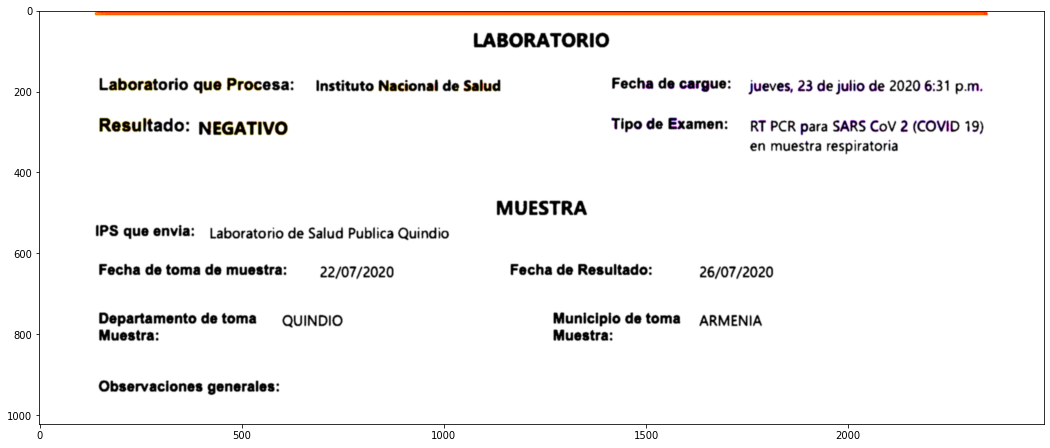

In [ ]:
# Escalado
img_procesada_3 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
# Umbral
img_procesada_3 = cv2.threshold(img_procesada_3, 180, 255,cv2.THRESH_BINARY)[1]
# Filtrado
img_procesada_3 = cv2.GaussianBlur(img_procesada_3, (5, 5), 0)

fig, ax = plt.subplots(figsize=(18, 18))
plt.imshow(img_procesada_3)

In [ ]:
print(pytesseract.image_to_string(img_procesada_3, config=custom_config))

LABORATORIO
Laboratorio que Procesa: Instituto Nacional de Salud Fecha de cargue: jueves, 23 de julio de 2020 6:31 p.m.
Resultado: NEGATIVO Tipo de Examen: RT PCR para SARS CoV 2 (COVID 19)
en muestra respiratoria
MUESTRA
IPS que envia: Laboratorio de Salud Publica Quindio
Fecha de toma de muestra: 22/07/2020 Fecha de Resultado: 26/07/2020
Departamento detoma QUINDIO Municipio detoma ARMENIA
Muestra: Muestra:
Observaciones generales:



* Efecto del Filtro y la Umbralización.  

Al aplicar el filtro Gaussiano y luego la umbralización binaria se obtuvo una imagen sin la marca de agua del fondo pero con un comportamiento no deseado en las partes que esta se solapa con el texto, principalmente en la parte de "Fecha de cargue:" y "Tipo de Examen", y al extraer el texto de esta imagen se obtiene un bajo rendimiento, en donde se introducen nuevos caracteres que no deberían de estar.

* Efecto de la Umbralización y el filtro  

Cuando se invierte el orden obtenemos un resultado mucho mejor, no tenemos la marca de agua del fondo y las letras no presentan el efecto visto anteiormente, visualmente se nota que la imagen esta difusa pero para Pytesseract esto no presenta mayor problema, solo se introduce un caracter extra pero el resto del texto tiene es claro.

### Dividir la imagen en secciones

In [ ]:
img = img_procesada_2
titulo1 = img[0:80,] # Titulo
laboratorio1 = img[80:180,0:600] # Datos del laboratorio
laboratorio2 = img[80:180,600:] # Datos del laboratorio
titulo2 = img[200:260,] # Titulo 2
muestra1 = img[260:360] # IPS y fechas
muestra2 = img[360:420,:280] # Departamento de muestra
muestra3 = img[360:420,280:380] # Quindio
muestra4 = img[360:,600:800] # Municipio de muestra
muestra5 = img[360:,800:] # Armenia
muestra6 = img[450:,] # Titulo

resultados = np.array([titulo1, laboratorio1, laboratorio2, titulo2, muestra1, muestra2, muestra3, muestra4, muestra5, muestra6])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


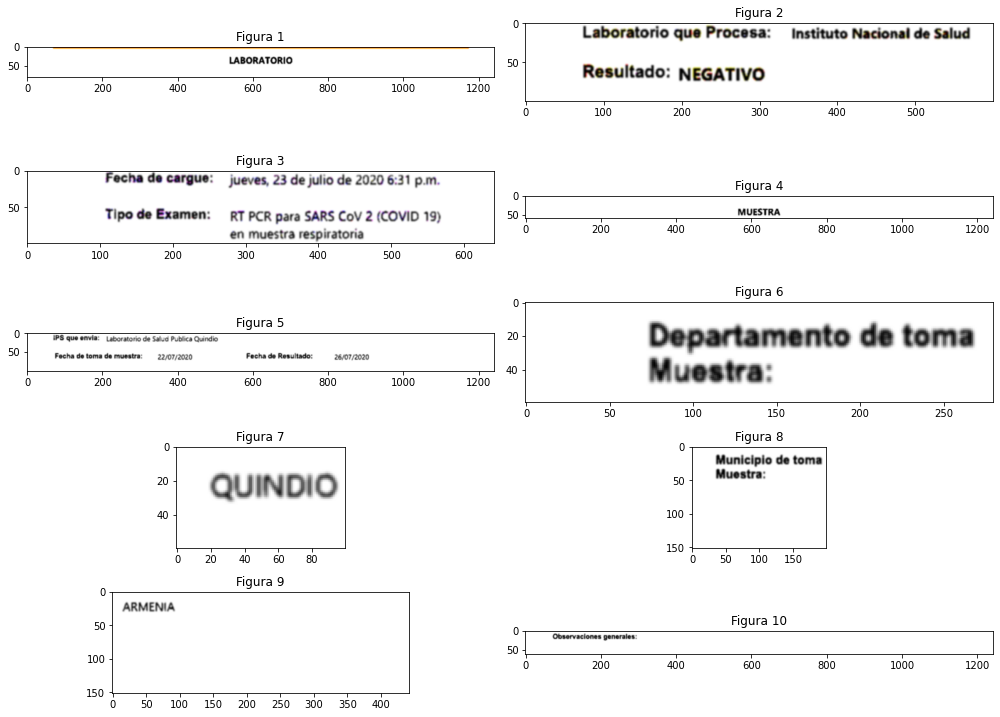

In [ ]:
fig,axs= plt.subplots(4,2,figsize=(14,10)) 
for i, resultado in list(enumerate(resultados)):
  plt.subplot(5,2,i+1)
  plt.title(f'Figura {i+1}')
  plt.imshow(resultado)
plt.tight_layout()


### Segmentar la imagen para extraer la informacion




In [ ]:
resultados_texto = []
custom_config = r'--oem 3 --psm 6' 
for resultado in resultados:
  resultados_texto.append( pytesseract.image_to_string(resultado, config=custom_config))


In [ ]:
for resmuestra in resultados_texto:
  print(resmuestra)

LABORATORIO

Laboratorio que Procesa: Instituto Nacional de Salud
Resultado: NEGATIVO

Fecha de cargue: jueves, 23 de julio de 2020 6:31 p.m.
Tipo de Examen: RT PCR para SARS CoV 2 (COVID 19)
en muestra respiratoria

MUESTRA

IPS que envia: Laboratorio de Salud Publica Quindio
Fecha de toma de muestra: = 22/07/2020 Fecha de Resultado: 26/07/2020

Departamento de toma
Muestra:

QUINDIO

Municipio de toma
Muestra:

ARMENIA

Observaciones generales:



FINALMENTE

## Perspectiva

### Carga de la imagen

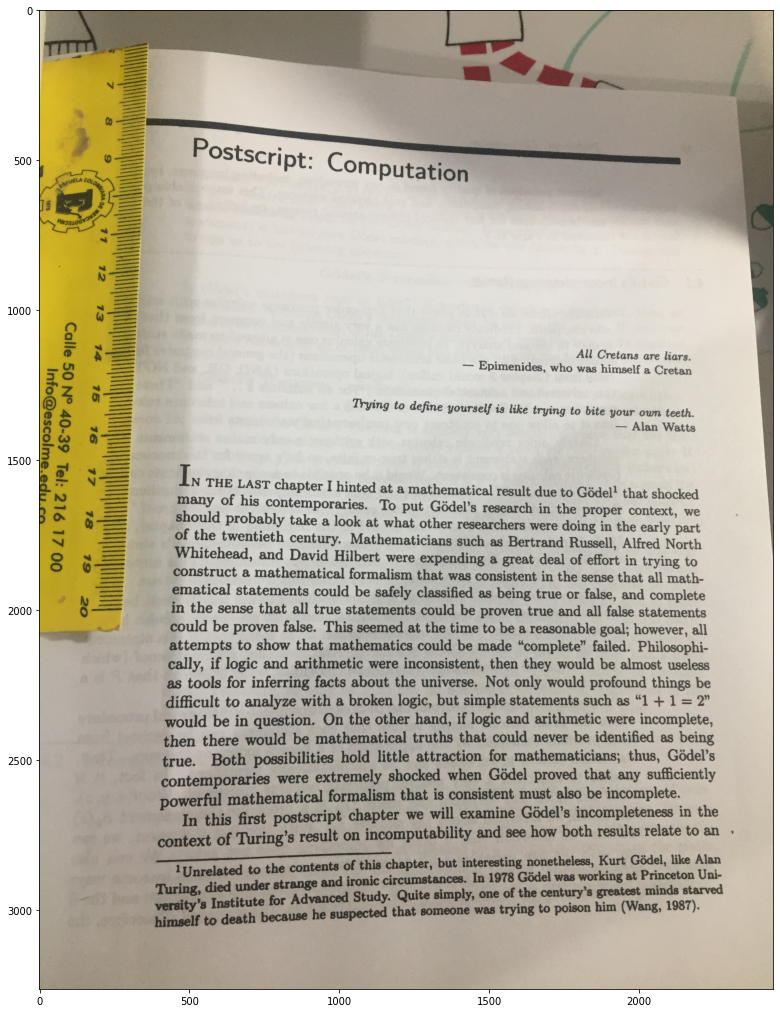

In [ ]:
path = '/content/drive/MyDrive/'
imagen = 'foto_1.JPG'
imagenRecortada = 'Resultado_recortado.jpg'
# Carga del archivo
img = cv2.imread(path+imagen)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(18, 18))
plt.imshow(img)
custom_config = r'--oem 1 --psm 6' 


### Definir ROI

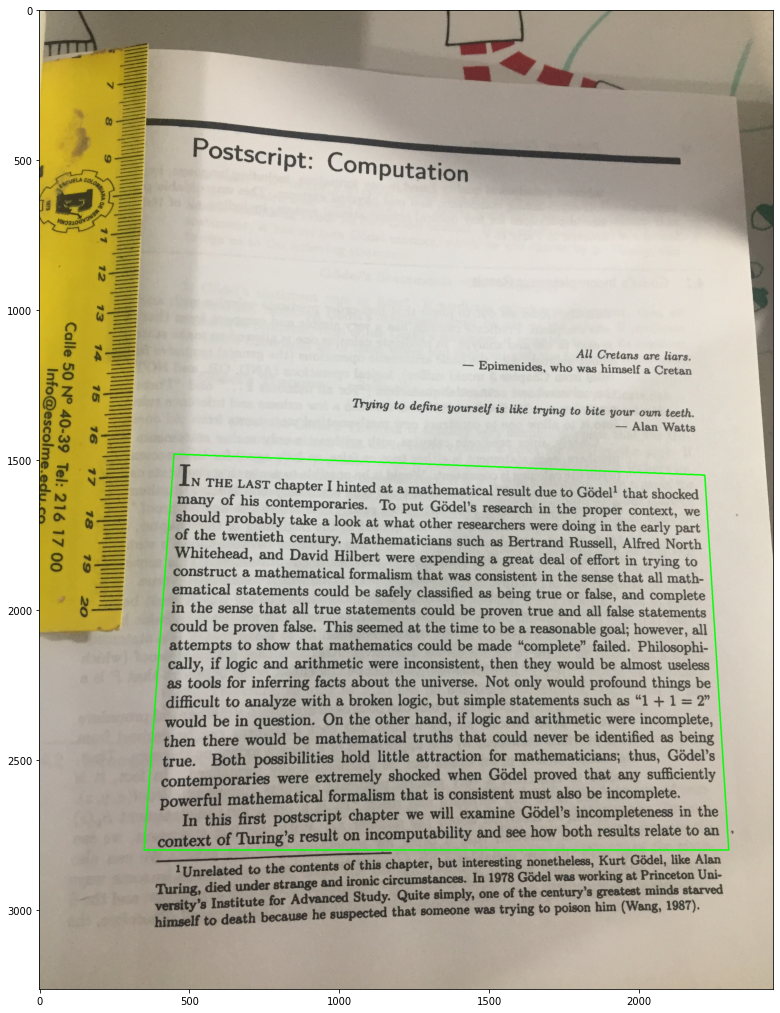

In [ ]:
# All points are in format [cols, rows]
imgt = cv2.line(img,(450,1480),(350,2800) ,(0,255,0),4)
imgt = cv2.line(img,(450,1480),(2220,1550) ,(0,255,0),4)
imgt = cv2.line(img,(2300,2800),(2220,1550) ,(0,255,0),4)
imgt = cv2.line(img,(2300,2800),(350,2800) ,(0,255,0),4)
fig, ax = plt.subplots(figsize=(18, 18))
plt.imshow(imgt)

In [ ]:
custom_config = r'--oem 3 --psm 6' 
print(pytesseract.image_to_string(imgt, config=custom_config))

Postscript. : —
Pt: Com Putation a
All Cretans are liars.
— Epimenides, who was himself a Cretan
Trying to define yourself is like trying to bite your own teeth.
— Alan Watts
a, THE LAST chapter I hinted at a mathematical result due to Gédel! that shocked
many of his contemporaries. To put Gédel’s research in the proper context, we
should probably take a look at what other researchers were doing in the early part
of the twentieth century, Mathematicians such as Bertrand Russell, Alfred North
Whitehead, and David Hilbert were expending a great deal of effort in trying to
construct a mathematical formalism that was consistent in the sense that all math-
ematical statements could be safely classified as being true or false, and complete
in the sense that all true statements could be proven true and all false statements
could be proven false. This seemed at the time to be a reasonable goal; however, all
™ attempts to show that mathematics could be made “complete” failed. Philosophi-
cally,

### Transformación

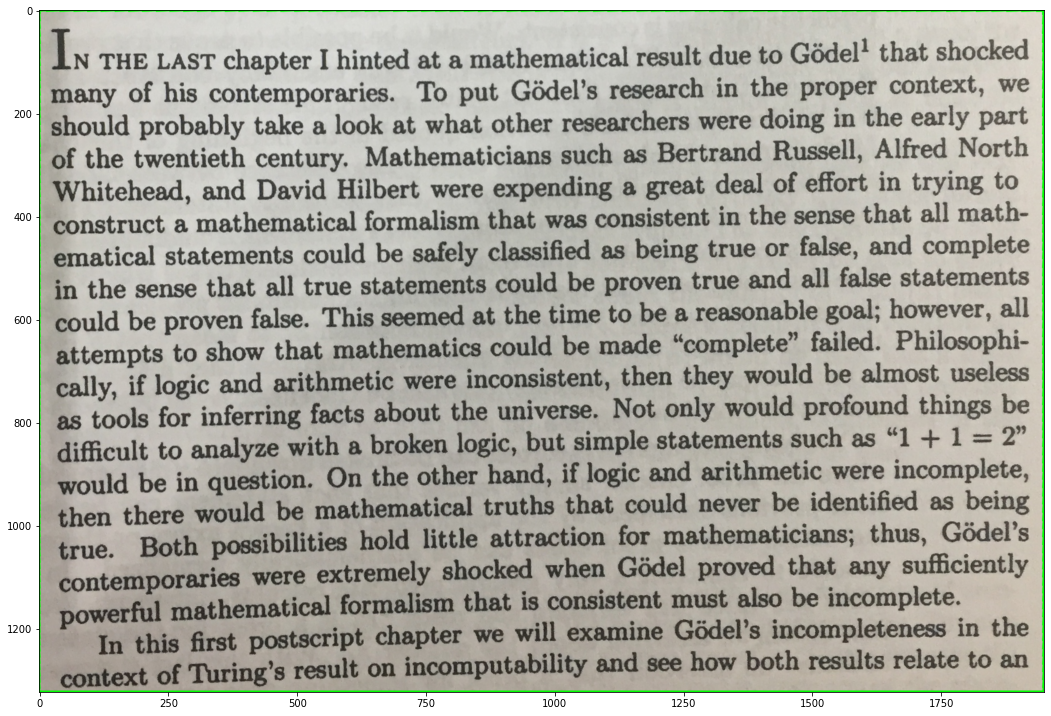

In [ ]:
"""
Tomado de https://theailearner.com/tag/cv2-getperspectivetransform/
"""
# All points are in format [cols, rows]
pt_A = [450, 1480]
pt_B = [350, 2800]
pt_C = [2300, 2800]
pt_D = [2220,1550]

# Here, I have used L2 norm. You can use L1 also.
width_AD = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
width_BC = np.sqrt(((pt_B[0] - pt_C[0]) ** 2) + ((pt_B[1] - pt_C[1]) ** 2))
maxWidth = max(int(width_AD), int(width_BC))
  
height_AB = np.sqrt(((pt_A[0] - pt_B[0]) ** 2) + ((pt_A[1] - pt_B[1]) ** 2))
height_CD = np.sqrt(((pt_C[0] - pt_D[0]) ** 2) + ((pt_C[1] - pt_D[1]) ** 2))
maxHeight = max(int(height_AB), int(height_CD))
input_pts = np.float32([pt_A, pt_B, pt_C, pt_D])
output_pts = np.float32([[0, 0],
                        [0, maxHeight - 1],
                        [maxWidth - 1, maxHeight - 1],
                        [maxWidth - 1, 0]])
# Compute the perspective transform M
M = cv2.getPerspectiveTransform(input_pts,output_pts)
out = cv2.warpPerspective(img,M,(maxWidth, maxHeight),flags=cv2.INTER_LINEAR)
fig, ax = plt.subplots(figsize=(18, 18))
plt.imshow(out)


In [ ]:
custom_config = r'--oem 3 --psm 6' 
print(pytesseract.image_to_string(out, config=custom_config))

B THE LAST chapter I hinted at a mathematical result due to Gédel! that shocked
many of his contemporaries. To put Gédel’s research in the proper context, we
should probably take a look at what other researchers were doing in the early part
of the twentieth century. Mathematicians such as Bertrand Russell, Alfred North
Whitehead, and David Hilbert were expending a great deal of effort in trying to
construct a mathematical formalism that was consistent in the sense that all math-
ematical statements could be safely classified as being true or false, and complete
in the sense that all true statements could be proven true and all false statements
could be proven false. This seemed at the time to be a reasonable goal; however, all
attempts to show that mathematics could be made “complete” failed. Philosophi-
cally, if logic and arithmetic were inconsistent, then they would be almost useless
as tools for inferring facts about the universe. Not only would profound things be
difficult to anal

### Preprocesamiento del ROI

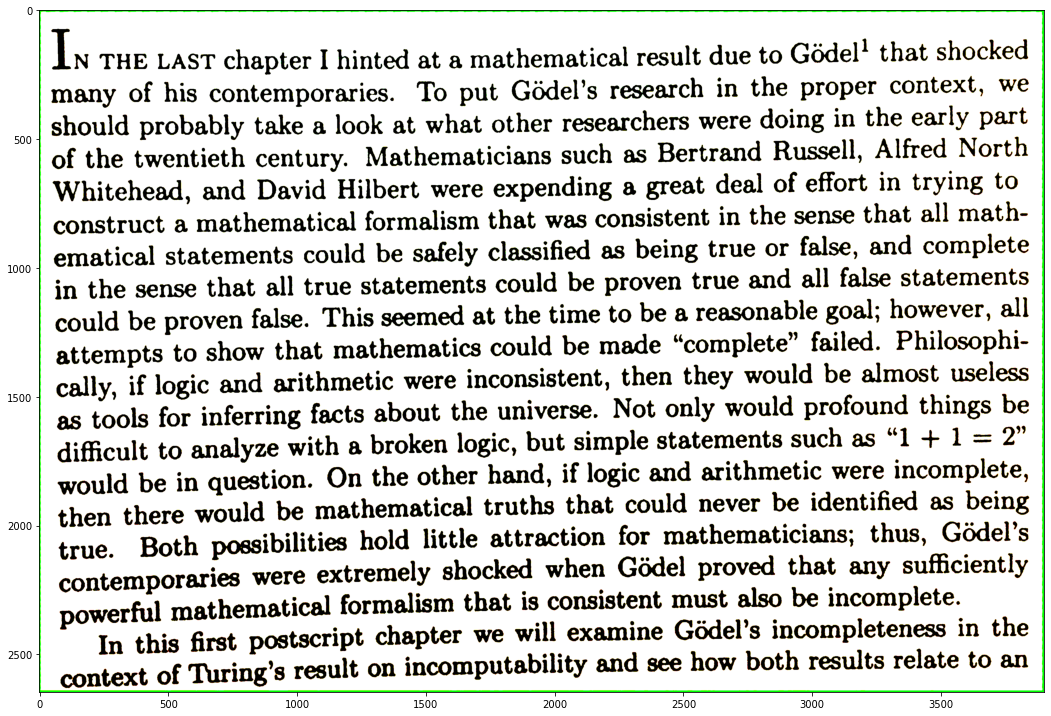

In [ ]:
# Escalado
img_procesada = cv2.resize(out, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

# Filtrado
img_procesada = cv2.GaussianBlur(img_procesada, (5, 5), 0)
# Umbral
img_procesada = cv2.threshold(img_procesada, 110, 255,cv2.THRESH_BINARY)[1]

fig, ax = plt.subplots(figsize=(18, 18))
plt.imshow(img_procesada)

In [ ]:
custom_config = r'--oem 1 --psm 6' 
print(pytesseract.image_to_string(img_procesada, config=custom_config))

In THE LAST chapter I hinted at a mathematical result due to Gédel! that shocked
many of his contemporaries. To put Gédel’s research in the proper context, we
should probably take a look at what other researchers were doing in the early part
of the twentieth century. Mathematicians such as Bertrand Russell, Alfred North
Whitehead, and David Hilbert were expending a great deal of effort in trying to
construct a mathematical formalism that was consistent in the sense that all math-
ematical statements could be safely classified as being true or false, and complete
in the sense that all true statements could be proven true and all false statements
could be proven false. This seemed at the time to be a reasonable goal; however, all
attempts to show that mathematics could be made “complete” failed. Philosophi-
cally, if logic and arithmetic were inconsistent, then they would be almost useless
as tools for inferring facts about the universe. Not only would profound things be
difficult to ana

# PyTorch

## Importación de librerías y carga de datos.

Teoría tomada de: 

[Designing Your Neural Networks](https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed)



In [ ]:
import torch
import torch.nn.functional as F
from torch import nn

#plot libs
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sn

#sklearn libs
from sklearn.model_selection import train_test_split
from sklearn import metrics

#system libs
import os
import sys

#io libs
import scipy.io as sio
import pandas as pd
import numpy as np
import cv2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
#!unzip /content/drive/Shareddrives/biosenales_sistemas/dataset_neumonia/chest_xray.zip

## Exploración del Dataset
### Explorar el dataset, hacer una breve descripción de la cantidad y características de los datos en la base de datos. Identificar si hay imágenes de un tamaño atípico, o que sean de un formato no convencional (10%).

In [ ]:
def verificar(ruta):
  """
  Verifica las extensiones de un directio y alerta sobre resultados diferentes al esperado.
  """
  sinAtipicos=[]
  for i in range(len(ruta)):
    img = cv2.imread(ruta[i],1)
    if ruta[i][-4:] != 'jpeg':
      print('Existen imagenes con diferentes extensiones', ruta[i])
    else:
      sinAtipicos.append(ruta[i])
  return sinAtipicos


 **Validacion**  
 Se verifican los directorios de entrenamiento para la clase pneumonia y normal.

In [ ]:
img_pneumonia_train = os.listdir(os.path.join('D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/train','PNEUMONIA'))
img_normal_train = os.listdir(os.path.join('D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/train','NORMAL'))
img_pneumonia_train_new=verificar(img_pneumonia_train)
img_normal_train_new=verificar(img_normal_train)


Existen imagenes con diferentes extensiones .DS_Store
Existen imagenes con diferentes extensiones .DS_Store


 Se verifican los directorios de prueba para la clase pneumonia y normal.

In [ ]:
img_pneumonia_test = os.listdir(os.path.join('D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/test','PNEUMONIA'))
img_normal_test = os.listdir(os.path.join('D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/test','NORMAL'))
img_pneumonia_test_new=verificar(img_pneumonia_test)
img_normal_test_new=verificar(img_normal_test)


 Se verifican los directorios de validación para la clase pneumonia y normal.

In [ ]:
img_pneumonia_val = os.listdir(os.path.join('D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/val','PNEUMONIA'))
img_normal_val = os.listdir(os.path.join('D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/val','NORMAL'))
img_pneumonia_val_new=verificar(img_pneumonia_val)
img_normal_val_new=verificar(img_normal_val)


Existen imagenes con diferentes extensiones .DS_Store
Existen imagenes con diferentes extensiones .DS_Store



Se verifica que todos los datos en las carpetas de Test, Train y Validacion tengan archivos del mismo formato y en caso de que no se descarta el archivo, solo se enctraron 4 archivos, 2 en entrenamiento y 2 en validación.  


In [ ]:
def extraer_dimensiones(path, imagenes):
  """
  Devuelve dos array con el valor de las dimensiones de todo un directorio
  """
  x_dimension = []
  y_dimension = []
  for imagen in imagenes:
    img = cv2.imread(path + imagen);
    x, y, _ = img.shape
    x_dimension.append(x)
    y_dimension.append(y)
  return np.array(x_dimension), np.array(y_dimension)
  

Luego de definir la función `extraer_dimensiones()` se verifican todos los directorios del dataset, con la finalidad de obtener un valor adecuado para establecer las dimensiones `x` y `y` para redimensionar las imágenes y estandarizarlas.

In [ ]:
path_pneumonia_train = 'D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/train/PNEUMONIA/'
path_pneumonia_test = 'D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/test/PNEUMONIA/'
path_pneumonia_val = 'D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/val/PNEUMONIA/'

path_normal_train = 'D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/train/NORMAL/'
path_normal_test = 'D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/test/NORMAL/'
path_normal_val = 'D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/val/NORMAL/'

x_pneunomia_train, y_pneunomia_train = extraer_dimensiones(path_pneumonia_train, img_pneumonia_train_new)
x_pneunomia_test, y_pneunomia_test = extraer_dimensiones(path_pneumonia_test, img_pneumonia_test_new)
x_pneunomia_val, y_pneunomia_val = extraer_dimensiones(path_pneumonia_val, img_pneumonia_val_new)

x_normal_train, y_normal_train = extraer_dimensiones(path_normal_train, img_normal_train_new)
x_normal_test, y_normal_test = extraer_dimensiones(path_normal_test, img_normal_test_new)
x_normal_val, y_normal_val = extraer_dimensiones(path_normal_val, img_normal_val_new)

Con las dimensiones almacenadas en variables se realiza un análisis estadístico.

In [ ]:
# Cuartiles para pneumonia
x_pneumonia_train_Q1, x_pneumonia_train_Q3 = np.quantile(x_pneunomia_train, 0.25, axis = 0), np.quantile(x_pneunomia_train, 0.75, axis = 0)
x_pneumonia_test_Q1, x_pneumonia_test_Q3 = np.quantile(x_pneunomia_test, 0.25, axis = 0), np.quantile(x_pneunomia_test, 0.75, axis = 0)
x_pneumonia_val_Q1, x_pneumonia_val_Q3 = np.quantile(x_pneunomia_val, 0.25, axis = 0), np.quantile(x_pneunomia_val, 0.75, axis = 0)

y_pneumonia_train_Q1, y_pneumonia_train_Q3 = np.quantile(y_pneunomia_train, 0.25, axis = 0), np.quantile(y_pneunomia_train, 0.75, axis = 0)
y_pneumonia_test_Q1, y_pneumonia_test_Q3 = np.quantile(y_pneunomia_test, 0.25, axis = 0), np.quantile(y_pneunomia_test, 0.75, axis = 0)
y_pneumonia_val_Q1, y_pneumonia_val_Q3 = np.quantile(y_pneunomia_val, 0.25, axis = 0), np.quantile(y_pneunomia_val, 0.75, axis = 0)

# Cuartiles para normal
x_normal_train_Q1, x_normal_train_Q3 = np.quantile(x_pneunomia_train, 0.25, axis = 0), np.quantile(x_pneunomia_train, 0.75, axis = 0)
x_normal_test_Q1, x_normal_test_Q3 = np.quantile(x_pneunomia_test, 0.25, axis = 0), np.quantile(x_pneunomia_test, 0.75, axis = 0)
x_normal_val_Q1, x_normal_val_Q3 = np.quantile(x_pneunomia_val, 0.25, axis = 0), np.quantile(x_pneunomia_val, 0.75, axis = 0)

y_normal_train_Q1, y_normal_train_Q3 = np.quantile(y_pneunomia_train, 0.25, axis = 0), np.quantile(y_pneunomia_train, 0.75, axis = 0)
y_normal_test_Q1, y_normal_test_Q3 = np.quantile(y_pneunomia_test, 0.25, axis = 0), np.quantile(y_pneunomia_test, 0.75, axis = 0)
y_normal_val_Q1, y_normal_val_Q3 = np.quantile(y_pneunomia_val, 0.25, axis = 0), np.quantile(y_pneunomia_val, 0.75, axis = 0)

print('Cuartiles para pneumonia de la dimension x')
print('\t Q1 \t Q3')
print('train: \t',x_pneumonia_train_Q1,x_pneumonia_train_Q3)
print('test: \t',x_pneumonia_test_Q1, x_pneumonia_test_Q3)
print('val: \t',x_pneumonia_val_Q1, x_pneumonia_val_Q3)
print('\nCuartiles para pneumonia de la dimension y')
print('\t Q1 \t Q3')
print('train: \t',y_pneumonia_train_Q1,y_pneumonia_train_Q3)
print('test: \t',y_pneumonia_test_Q1, y_pneumonia_test_Q3)
print('val: \t',y_pneumonia_val_Q1, y_pneumonia_val_Q3)
print('-------------------------------------------')
print('\nCuartiles para normal de la dimension x')
print('\t Q1 \t Q3')
print('train: \t',x_normal_train_Q1,x_normal_train_Q3)
print('test: \t',x_normal_test_Q1, x_normal_test_Q3)
print('val: \t',x_normal_val_Q1, x_normal_val_Q3)
print('\nCuartiles para normal de la dimension y')
print('\t Q1 \t Q3')
print('train: \t',y_normal_train_Q1,y_normal_train_Q3)
print('test: \t',y_normal_test_Q1, y_normal_test_Q3)
print('val: \t',y_normal_val_Q1, y_normal_val_Q3)


Cuartiles para pneumonia de la dimension x
	 Q1 	 Q3
train: 	 640.0 968.0
test: 	 632.0 871.75
val: 	 662.0 946.0

Cuartiles para pneumonia de la dimension y
	 Q1 	 Q3
train: 	 1000.0 1368.0
test: 	 992.0 1256.0
val: 	 1058.0 1296.0
-------------------------------------------

Cuartiles para normal de la dimension x
	 Q1 	 Q3
train: 	 640.0 968.0
test: 	 632.0 871.75
val: 	 662.0 946.0

Cuartiles para normal de la dimension y
	 Q1 	 Q3
train: 	 1000.0 1368.0
test: 	 992.0 1256.0
val: 	 1058.0 1296.0


In [ ]:
x_pneumonia_nominal = int(((x_pneunomia_train.mean() + x_pneunomia_train.std() )+ (x_pneunomia_test.mean() + x_pneunomia_test.std()) + (x_pneunomia_val.mean() + x_pneunomia_val.std()))/3)
y_pneumonia_nominal = int(((y_pneunomia_train.mean() + y_pneunomia_train.std() )+ (y_pneunomia_test.mean() + y_pneunomia_test.std()) + (y_pneunomia_val.mean() + y_pneunomia_val.std()))/3)

x_normal_nominal = int(((x_normal_train.mean() + x_normal_train.std() )+ (x_normal_test.mean() + x_normal_test.std()) + (x_normal_val.mean() + x_normal_val.std()))/3)
y_normal_nominal = int(((y_normal_train.mean() + y_normal_train.std() )+ (y_normal_test.mean() + y_normal_test.std()) + (y_normal_val.mean() + y_normal_val.std()))/3)

In [ ]:
print('Valores promedio para las dimensiones de las imagenes de pneumonia y normal.')
print(f'x para pneumonia = {x_pneumonia_nominal}\t | y para pneumonia = {y_pneumonia_nominal}')
print(f'x para normal = {x_normal_nominal}\t | y para normal = {y_normal_nominal}')

Valores promedio para las dimensiones de las imagenes de pneumonia y normal.
x para pneumonia = 1016	 | y para pneumonia = 1424
x para normal = 1621	 | y para normal = 1936


El criterio para encontrar estos valores fue definido como la media de los datos por clase más una desviación estándar, siendo este el umbral para redimensionar las imágenes.

Así mismo se compararon los resultados de los cuartiles y el umbral definido para establecer una dimensión adecuada, teniendo en cuenta que el algoritmo requiere que la entrada sea una imagen cuadrada y que tanto las imágenes de prueba, entrenamiento y validación deben tener la misma dimensión, se selecciona un tamaño de píxel de `512x512` para incluir la mayor cantidad de información del conjunto de datos.

## Escalado y corrección de color

### A partir de la descripción del punto pasado escoger un tamaño adecuado para escalar las imágenes y convertirlas a grises. Ambas operaciones usando OpenCV (10%)


**Transformación de color y tamaño**  
Para convertir las imágenes a escala de grises se implementa un método de OpenCV capaz de convertir la entrada RGB a blanco y negro, dicho proceso se realiza en la construcción personalizada del Dataset.

Además, con base en el tamaño definido para las dimensiones de las imágenes se realiza un escalado en la función `CustomImageDataset()`, preguntando en el constructor si se ingresa un diccionario especificando las nuevas dimensiones a escalar.


### Corregir el Dataset para que no quede la transformación de Grayscale, ya realizada en OpenCV, y consultar e introducir la normalización de los datos de imágenes en Pytorch (10%)

Para sustituir la transformación de Grayscale se implementa la función de OpenCv `cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY)` como se menciona anteriormente. 

**Normalización de datos en PyTorch**  

Para hacer esta operación se seguirá el siguiente flujo de trabajo:

* Con la imagen cargada se transforma a un tensor usando `torchvision.transforms.ToTensor()`.  
* Cálculo de la media y la desviación estándar de la imagen.  
* Normalización de la imagen usando `torchvision.transforms.Normalize()`.  


**Referencia:** https://www.geeksforgeeks.org/how-to-normalize-images-in-pytorch/ 

In [ ]:
import os
from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision import transforms

class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None, target_transform=None, n = None):
      self.img_dir = root_dir

      img_normal = os.listdir(os.path.join(self.img_dir,'NORMAL'))
      #print(img_normal)

      img_pneumonia = os.listdir(os.path.join(self.img_dir,'PNEUMONIA'))
      

      img_normal=verificar(os.listdir(os.path.join(self.img_dir,'NORMAL')))
      img_pneumonia=verificar(os.listdir(os.path.join(self.img_dir,'PNEUMONIA')))
      img_labels_normal = np.zeros(len(img_normal))
      img_labels_pneumonia = np.ones(len(img_pneumonia))

      #print(img_normal)
      self.img_labels = np.hstack((img_labels_normal,img_labels_pneumonia))
      self.img = [*img_normal, *img_pneumonia]

      self.transform = transform
      self.target_transform = target_transform
      self.n = n
    def __len__(self):
      return len(self.img_labels)

    def __getitem__(self, idx):
        label = self.img_labels[idx]
        #the names of the files is concatenated, using the label we can know the 
        #folder
        group = ''
        if label == 0:
          group = "NORMAL"
          if self.n:
            x, y = self.n['NORMAL']
        else:
          group = "PNEUMONIA"
          if self.n:
            x, y = self.n['PNEUMONIA']
        if self.img[idx] != ".DS_Store":
          img_path = os.path.join(self.img_dir, group, self.img[idx])
      
          image = cv2.imread(img_path)
          # Correccion de color a blanco y negro
          image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
          
          # Escalado
          if self.n:
            image = cv2.resize(image, (x, y))
          
          # Normalizacion de las imagenes
          transform = transforms.Compose([transforms.ToTensor()])
          image_tr = transform(image)
          mean, std = image_tr.mean([1,2]), image_tr.std([1,2])
          transform_norm = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean, std)])
          image = transform_norm(image)

          sample = (image, label)
        else:
          sample = None
        return sample

**Prueba de escritorio**  

Para visualizar el efecto del escalado, transformación de color y normalización vamos a leer una imagen del dataset de entrenamiento y se graficará.

Existen imagenes con diferentes extensiones .DS_Store
Existen imagenes con diferentes extensiones .DS_Store


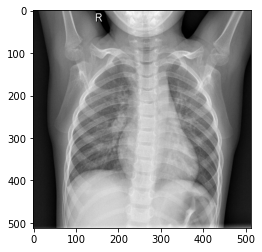

In [ ]:
dir_data='D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/train'

n = {'PNEUMONIA': (512, 512), 'NORMAL': (512, 512)}
dataset = CustomImageDataset(dir_data, n = n)
a = dataset[0] # Seleccion de los datos de la imagen
plt.imshow(a[0][0], cmap = 'gray') # Visualizar la imagen

## Creación de la red neuronal

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):

    def __init__(self):
        super(NeuralNetwork, self).__init__()
        #https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16*61*61, 120)  # 61*61 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.relu(self.conv1(x))
        #torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
        x = F.max_pool2d(x, (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


Proponer y justificar dos arquitecturas diferentes de red y programarlas (10%)

In [ ]:
def red_hiperparametros(learning_rate = 0.001, batch_size = 32, epochs = 100, momentum = 0.9, resize = 512, net = NeuralNetwork()):
  """
  Funcion para crear una red neuronal ingresando los hiperparametros y el tipo de red.
  Devuelve los Dataloader de entrenamiento y prueba, ademas del optimizer y la funcion de perdida.
  """
  from torch.utils.data import DataLoader

  learning_rate = learning_rate #change to adapt
  batch_size = batch_size
  epochs = epochs
  # Definicion de las dimensiones a escalar
  n = {'PNEUMONIA': (resize,resize), 'NORMAL': (resize,resize)}

  # Creacion del dataloader para entrenamiento
  dir_data='D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/train'
  train_dataset = CustomImageDataset(dir_data,n = n)
  train_dataloader = DataLoader(train_dataset, batch_size,shuffle=True)

  # Creacion del dataloader para pruebas

  dir_data='D:/Universidad/PDI/Proyecto_3/chest_xray/chest_xray/test'
  test_dataset = CustomImageDataset(dir_data, n = n)
  test_dataloader = DataLoader(test_dataset, batch_size,shuffle=True)

  #initialize net
  net = net
  net.to(device)
  momentum = momentum  
  optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum,nesterov=True)
  loss_fn = nn.BCEWithLogitsLoss() #loss function

  return train_dataloader, test_dataloader, optimizer, loss_fn


In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        y = y.unsqueeze(1)
        y = y.float()
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 40 == 0:
          loss, current = loss.item(), batch * len(X)
          print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    #print(size)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            y = y.unsqueeze(1)
            y = y.float()         
            pred = model(X)
            #print(pred,y)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= size
    correct /= size
    # print(test_loss)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


### SDG

La función SDG es un paquete que implementa varios algoritmos de optimización, este  construye un objeto optimizador, que mantendrá el estado actual y actualizará los parámetros en función de los gradientes calculados. Para la construcción del optimizador es un objeto iterable  que busca encontrar los parámetros más óptimos, variando opciones como el tipo de optimizador, tasa de aprendizaje y disminución de peso.  

En el optimizador SGD, se seleccionan algunas muestras de manera aleatoria en lugar de tomar todo el conjunto de datos para cada iteración. Para optimizar una función se utiliza `torch.optim`, que es un paquete que implementa numerosos algoritmos de optimización.  


Tomado de: https://www.projectpro.io/recipes/optimize-function-sgd-pytorch

### Funcionamiento de los hiperparámetros:  
Los hiperparámetros son variables que determinan cómo es la estructura de una red neuronal, por ejemplo, pueden establecer el número de unidades ocultas. Además, son las variables que determinan cómo se entrena la red, entre estos. Por lo tanto, los hiperparámetros se deben establecer antes de realizar el entrenamiento de la red neuronal.  


* **learning_rate**  

Entre los hiperparámetros más importantes encontramos el “learning_rate” también conocido como tasa de aprendizaje, que es un parámetro de ajuste en un algoritmo de optimización, el cual, determina el tamaño del paso en cada iteración mientras avanza hacia un mínimo de una función de pérdida. Es decir, define la rapidez con la que una red actualiza sus parámetros. La importancia de la correcta definición de este hiperparámetro radica en que, si se selecciona una tasa de aprendizaje inapropiada, la velocidad de convergencia se reducirá o conducirá a la vibración de la convergencia e incluso puede generar la divergencia del algoritmo de entrenamiento.  
En consecuencia, una baja tasa de aprendizaje ralentiza el proceso de aprendizaje pero converge sin problemas. Pero una tasa de aprendizaje más grande acelera el aprendizaje, pero es posible que no converja.   

* **batch_size**  

Este hiperparámetro define el número de datos que tiene cada iteración de un ciclo (epoch). Si este número es pequeño, la red tiene poca cantidad de datos en la memoria, y se entrena más rápido. Sin embargo, es posible que no aprenda las características y detalles que pueden ser significativos en la predicción. Por otro lado, si este número es grande, ocurre al contrario: es más probable que tenga en cuenta los casos más importantes a la hora de aprender, pero entrena más lento.  
* **Epoch**  

Este hiperparámetro determina el número de veces que tomamos todos los datos de entrenamiento.Una época significa que cada muestra en el conjunto de datos de entrenamiento ha tenido la oportunidad de actualizar los parámetros del modelo interno y los  conjuntos de datos generalmente se agrupan en lotes (especialmente cuando la cantidad de datos es muy grande).  

Tomado de:  
https://www.sciencedirect.com/science/article/pii/S089360801830340X#b14  

https://academica-e.unavarra.es/xmlui/bitstream/handle/2454/33697/memoria.pdf?sequence=1&isAllowed=y


Consultar estrategías de regularización en Pytorch como Dropout y Early Stopping e implementar (10%)

In [ ]:
class NeuralNetwork_DropOut(nn.Module):

    def __init__(self):
        super(NeuralNetwork_DropOut, self).__init__()
        #https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16*61*61, 120)  # 61*61 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)

        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.relu(self.conv1(x))
        #torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
        x = F.max_pool2d(x, (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


In [ ]:
# Modelo Dropout
epochs = 30
batch_size = 32
learning_rate = 0.3
resize = 256
net = NeuralNetwork_DropOut()

train_dataloader, test_dataloader, optimizer, loss_fn = red_hiperparametros(learning_rate = learning_rate, batch_size = batch_size, epochs = epochs, resize = resize, net = net)

Existen imagenes con diferentes extensiones .DS_Store
Existen imagenes con diferentes extensiones .DS_Store


In [ ]:
print(f'Capas = (120, 84, 1), batch = {batch_size}, ln = {learning_rate}, momentum = 0.9')
print('nn aplicando Dropout')
for t in range(epochs):
    print(f"epoch = {t+1}\n-------------------------------")
    train_loop(train_dataloader, net, loss_fn, optimizer)
    test_loop(test_dataloader, net, loss_fn)
print("Done!")

Capas = (120, 84, 1), batch = 32, ln = 0.3, momentum = 0.9
nn aplicando Dropout
epoch = 1
-------------------------------
loss: 0.699182  [    0/ 5216]
loss: 0.493921  [ 1280/ 5216]
loss: 0.636261  [ 2560/ 5216]
loss: 0.659653  [ 3840/ 5216]
loss: 0.449704  [ 5120/ 5216]
Test Error: 
 Accuracy: 1187.2%, Avg loss: 0.021752 

epoch = 2
-------------------------------
loss: 0.476227  [    0/ 5216]
loss: 0.531086  [ 1280/ 5216]
loss: 0.404118  [ 2560/ 5216]
loss: 0.438974  [ 3840/ 5216]
loss: 0.622147  [ 5120/ 5216]
Test Error: 
 Accuracy: 1179.5%, Avg loss: 0.022481 

epoch = 3
-------------------------------
loss: 0.562417  [    0/ 5216]
loss: 0.540841  [ 1280/ 5216]
loss: 0.653686  [ 2560/ 5216]
loss: 0.414256  [ 3840/ 5216]
loss: 0.562399  [ 5120/ 5216]
Test Error: 
 Accuracy: 1182.1%, Avg loss: 0.022022 

epoch = 4
-------------------------------
loss: 0.533380  [    0/ 5216]
loss: 0.565701  [ 1280/ 5216]
loss: 0.621845  [ 2560/ 5216]
loss: 0.562392  [ 3840/ 5216]
loss: 0.496025  [ 51

A partir del modelo realizado con el método DropOut se observa que la función de pérdida esta funcionando correctamente, debido a que medida que se va aumentando las iteraciones de cada ciclo, la pérdida va disminuyendo, lo cual es esperado dado que cuando se tiene un tamaño de batch mayor, se espera que la red neuronal sea capaz de aprender la información más relevante para poder realizar una buena clasificación. Sin embargo, no se obtuvieron resultados congruentes del parámetro `accuracy` con lo esperado, dado que los valores coherentes se encuentran en un rango de `0% - 100%` pero los valores obtenidos para este modelo lo superan, obteniendo valores por encima del `1100 %`, indicando que el modelo tiene un sobreentranamiento. Dando cuenta que la técnica DropOut no esta evitando el sobreajuste de la red.  

Proponer tres modelos con sus respectivas pruebas incluyendo información sobre los hiperparámetros consultados que puedan dar una buena precisión de clasificación (10%) 

### Modelo 1  
En este modelo vamos a implementar el tamaño del batch sugerido para este tipo de datos, una rata de aprendizaje de 0.01 y 30 epocas. 

In [ ]:
# Modelo 1
epochs = 30
batch_size = 32
learning_rate = 0.01
resize = 256
net = NeuralNetwork()

train_dataloader, test_dataloader, optimizer, loss_fn = red_hiperparametros(learning_rate = learning_rate, batch_size = batch_size, epochs = epochs, resize = resize, net = net)

Existen imagenes con diferentes extensiones .DS_Store
Existen imagenes con diferentes extensiones .DS_Store


In [ ]:
print(f'Capas = (120, 84, 1), batch = {batch_size}, ln = {learning_rate}, momentum = 0.9')
for t in range(epochs):
    print(f"epoch = {t+1}\n-------------------------------")
    train_loop(train_dataloader, net, loss_fn, optimizer)
    test_loop(test_dataloader, net, loss_fn)
print("Done!")

Capas = (120, 84, 1), batch = 32, ln = 0.01, momentum = 0.9
epoch = 1
-------------------------------
loss: 0.692245  [    0/ 5216]
loss: 0.100968  [ 1280/ 5216]
loss: 0.157538  [ 2560/ 5216]
loss: 0.280653  [ 3840/ 5216]
loss: 0.068030  [ 5120/ 5216]
Test Error: 
 Accuracy: 1184.6%, Avg loss: 0.044375 

epoch = 2
-------------------------------
loss: 0.057651  [    0/ 5216]
loss: 0.314415  [ 1280/ 5216]
loss: 0.047624  [ 2560/ 5216]
loss: 0.098373  [ 3840/ 5216]
loss: 0.094256  [ 5120/ 5216]
Test Error: 
 Accuracy: 1187.2%, Avg loss: 0.022055 

epoch = 3
-------------------------------
loss: 0.017047  [    0/ 5216]
loss: 0.075096  [ 1280/ 5216]
loss: 0.021359  [ 2560/ 5216]
loss: 0.033411  [ 3840/ 5216]
loss: 0.039483  [ 5120/ 5216]
Test Error: 
 Accuracy: 1192.3%, Avg loss: 0.032541 

epoch = 4
-------------------------------
loss: 0.063425  [    0/ 5216]
loss: 0.003974  [ 1280/ 5216]
loss: 0.010100  [ 2560/ 5216]
loss: 0.036027  [ 3840/ 5216]
loss: 0.013492  [ 5120/ 5216]
Test Error

Con el modelo propuesto, se pretende observar los resultados al variar el hiperparámetro `Learning rate ` con un valor de 0.01 , en donde se observa que los resultados obtenidos no mejoran significativamente, además de nuevamente presentar un sobreentrenamiento de la red en cuestión. Con esta variación, se esperaba aumentar la velocidad del proceso de aprendizaje para asegurar la convergencia de los datos de la red. 



### Modelo 2  
Ahora se van a modificar los hiperparámetros de tamaño de batch y rata de aprendizaje.

In [ ]:
# Modelo 2
epochs = 30
batch_size = 16
learning_rate = 0.3
resize = 256
net = NeuralNetwork()

train_dataloader, test_dataloader, optimizer, loss_fn = red_hiperparametros(learning_rate = learning_rate, batch_size = batch_size, epochs = epochs, resize = resize, net = net)

Existen imagenes con diferentes extensiones .DS_Store
Existen imagenes con diferentes extensiones .DS_Store


In [ ]:
print(f'Capas = (120, 84, 1), batch = {batch_size}, ln = {learning_rate}, momentum = 0.9')
for t in range(epochs):
    print(f"epoch = {t+1}\n-------------------------------")
    train_loop(train_dataloader, net, loss_fn, optimizer)
    test_loop(test_dataloader, net, loss_fn)
print("Done!")

Capas = (120, 84, 1), batch = 16, ln = 0.3, momentum = 0.9
epoch = 1
-------------------------------
loss: 0.655144  [    0/ 5216]
loss: 0.511073  [  640/ 5216]
loss: 0.701095  [ 1280/ 5216]
loss: 0.562810  [ 1920/ 5216]
loss: 0.422487  [ 2560/ 5216]
loss: 0.628772  [ 3200/ 5216]
loss: 0.710355  [ 3840/ 5216]
loss: 0.489373  [ 4480/ 5216]
loss: 0.576331  [ 5120/ 5216]
Test Error: 
 Accuracy: 600.0%, Avg loss: 0.041938 

epoch = 2
-------------------------------
loss: 0.571194  [    0/ 5216]
loss: 0.482611  [  640/ 5216]
loss: 0.482397  [ 1280/ 5216]
loss: 0.513268  [ 1920/ 5216]
loss: 0.621105  [ 2560/ 5216]
loss: 0.761874  [ 3200/ 5216]
loss: 0.491497  [ 3840/ 5216]
loss: 0.347463  [ 4480/ 5216]
loss: 0.771535  [ 5120/ 5216]
Test Error: 
 Accuracy: 600.0%, Avg loss: 0.041746 

epoch = 3
-------------------------------
loss: 0.621277  [    0/ 5216]
loss: 0.506331  [  640/ 5216]
loss: 0.563590  [ 1280/ 5216]
loss: 0.621240  [ 1920/ 5216]
loss: 0.453451  [ 2560/ 5216]
loss: 0.758173  [ 3

Con el modelo #2, se pretende observar los resultados al variar los hiperparámetros de `Learning rate ` con un valor de 0.3 y el `batch size` , en donde se observa que los resultados obtenidos nuevamente no mejoran. Además de nuevamente presentar un sobreentrenamiento de la red en cuestión. Con esta variación, se esperaba observar los cambios del parámetro `Learning rate` al cambiar de un valor muy pequeño como 0.01 a 0.3, en donde se puede identificar que la tasa de aprendizaje analizada aún permite la convergencia de los datos. Por otro lado, con la disminución del batch size, se observa que se disminuye el número de datos que tiene un ciclo, donde se pudo observar que se reduce la métrica de `accuracy` a 600% aproximadamente lo cual hace que decrezca el sobreentranamiento de los datos.

### Modelo 3  
Luego se varia nuevamente el tamaño de batch y la rata de aprendizaje.

In [ ]:
# Modelo 3
epochs = 30
batch_size = 2
learning_rate = 0.001
resize = 256
net = NeuralNetwork()

train_dataloader, test_dataloader, optimizer, loss_fn = red_hiperparametros(learning_rate = learning_rate, batch_size = batch_size, epochs = epochs, resize = resize, net = net)

Existen imagenes con diferentes extensiones .DS_Store
Existen imagenes con diferentes extensiones .DS_Store


In [ ]:
print(f'Capas = (120, 84, 1), batch = {batch_size}, ln = {learning_rate}, momentum = 0.9')
for t in range(epochs):
    print(f"epoch = {t+1}\n-------------------------------")
    train_loop(train_dataloader, net, loss_fn, optimizer)
    test_loop(test_dataloader, net, loss_fn)
print("Done!")

Capas = (120, 84, 1), batch = 2, ln = 0.001, momentum = 0.9
epoch = 1
-------------------------------
loss: 0.697176  [    0/ 5216]
loss: 0.430653  [   80/ 5216]
loss: 0.294332  [  160/ 5216]
loss: 0.041408  [  240/ 5216]
loss: 0.128440  [  320/ 5216]
loss: 0.134062  [  400/ 5216]
loss: 1.707978  [  480/ 5216]
loss: 0.030814  [  560/ 5216]
loss: 0.052323  [  640/ 5216]
loss: 0.095769  [  720/ 5216]
loss: 0.739226  [  800/ 5216]
loss: 0.031324  [  880/ 5216]
loss: 0.068080  [  960/ 5216]
loss: 0.046025  [ 1040/ 5216]
loss: 0.016454  [ 1120/ 5216]
loss: 0.000004  [ 1200/ 5216]
loss: 1.204949  [ 1280/ 5216]
loss: 0.088183  [ 1360/ 5216]
loss: 0.097299  [ 1440/ 5216]
loss: 0.000267  [ 1520/ 5216]
loss: 0.470286  [ 1600/ 5216]
loss: 0.000584  [ 1680/ 5216]
loss: 0.010437  [ 1760/ 5216]
loss: 0.090421  [ 1840/ 5216]
loss: 0.000794  [ 1920/ 5216]
loss: 0.561793  [ 2000/ 5216]
loss: 0.257273  [ 2080/ 5216]
loss: 0.014321  [ 2160/ 5216]
loss: 0.010977  [ 2240/ 5216]
loss: 0.081647  [ 2320/ 5216

En el modelo #3, se pretende observar los resultados al variar los hiperparámetros de `Learning rate ` con un valor de 0.01 y el `batch size` de 2 , en donde se observa que los resultados obtenidos mejoran ya que se obtienen valores de la métrica accuracy de un 75% lo cual indica que la red es capaz de diferenciar la clase normal de la clase pneumonia con una fiabilidad alta. Sin embargo, este resultado puede tener asociado un error, dado que el tamaño del batch es muy pequeño, por lo que solamente se están comparando dos datos en cada iteración del ciclo, lo cual puede sesgar el resultado y aumentar el número de falsos positivos.   

### Modelo 4  
Finalmente se cambiara el momento y la funcion de perdida manteniendo un tamaño de batch y rata de aprendizaje igual al modelo 1.

In [ ]:
# Ahora se va a modificar la funcion de perdida
# Modelo 4
epochs = 30
batch_size = 32
learning_rate = 0.01
momentum = 0.2
resize = 256
net = NeuralNetwork()

train_dataloader, test_dataloader, optimizer, loss_fn = red_hiperparametros(momentum = momentum, learning_rate = learning_rate, batch_size = batch_size, epochs = epochs, resize = resize, net = net)
loss_fn = nn.CrossEntropyLoss()

Existen imagenes con diferentes extensiones .DS_Store
Existen imagenes con diferentes extensiones .DS_Store


In [ ]:
print(f'Capas = (120, 84, 1), batch = {batch_size}, ln = {learning_rate}, momentum = {momentum}')
for t in range(epochs):
    print(f"epoch = {t+1}\n-------------------------------")
    train_loop(train_dataloader, net, loss_fn, optimizer)
    test_loop(test_dataloader, net, loss_fn)
print("Done!")

Capas = (120, 84, 1), batch = 32, ln = 0.01, momentum = 0.2
epoch = 1
-------------------------------
loss: -0.000000  [    0/ 5216]
loss: -0.000000  [ 1280/ 5216]
loss: -0.000000  [ 2560/ 5216]
loss: -0.000000  [ 3840/ 5216]
loss: -0.000000  [ 5120/ 5216]
Test Error: 
 Accuracy: 1184.6%, Avg loss: 0.000000 

epoch = 2
-------------------------------
loss: -0.000000  [    0/ 5216]
loss: -0.000000  [ 1280/ 5216]
loss: -0.000000  [ 2560/ 5216]
loss: -0.000000  [ 3840/ 5216]
loss: -0.000000  [ 5120/ 5216]
Test Error: 
 Accuracy: 1189.7%, Avg loss: 0.000000 

epoch = 3
-------------------------------
loss: -0.000000  [    0/ 5216]
loss: -0.000000  [ 1280/ 5216]
loss: -0.000000  [ 2560/ 5216]
loss: -0.000000  [ 3840/ 5216]
loss: -0.000000  [ 5120/ 5216]
Test Error: 
 Accuracy: 1182.1%, Avg loss: 0.000000 

epoch = 4
-------------------------------
loss: -0.000000  [    0/ 5216]
loss: -0.000000  [ 1280/ 5216]
loss: -0.000000  [ 2560/ 5216]
loss: -0.000000  [ 3840/ 5216]
loss: -0.000000  [ 51

Finalmente, en el modelo #4 se plantea la variación del momentum que es un parámetro del método SGD el cual indica que para valores cercanos a 1, se obtiene un mejor rendimiento. 

## Momentum

Gradient Descent takes tiny, consistent steps towards the local minima and when the gradients are tiny it can take a lot of time to converge. 

Momentum on the other hand takes into account the previous gradients, and accelerates convergence by pushing over valleys faster and avoiding local minima.

In general, you want your momentum value to be very close to one. 

0.9 is a good place to start for smaller datasets, and you want to move progressively closer to one (0.999) the larger your dataset gets.

## Vanishing + Exploding Gradients

Not all neural network layers learn at the same speed. 

So when the backprop algorithm propagates the error gradient from the output layer to the first layers, the gradients get smaller and smaller until they’re almost negligible when they reach the first layers. This means the weights of the first layers aren’t updated significantly at each step. This is the problem of vanishing gradients. 

A similar problem of exploding gradients occurs when the gradients for certain layers get progressively larger, leading to massive weight updates for some layers as opposed to the others.

There are a few ways to counteract vanishing gradients. Let’s take a look at them now!

### Activation functions

#### Hidden Layer Activation

In general, the performance from using different activation functions improves in this order (from lowest→highest performing): logistic → tanh → ReLU → Leaky ReLU → ELU → SELU.

ReLU is the most popular activation function and if you don’t want to tweak your activation function, ReLU is a great place to start. But, keep in mind ReLU is becoming increasingly less effective than ELU or GELU.

If you’re feeling more adventurous, you can try the following:


*   to combat neural network overfitting: RReLU
*   reduce latency at runtime: leaky ReLU
*   for massive training sets: PReLU
*   for fast inference times: leaky ReLU
*   if your network doesn’t self-normalize: ELU
*   for an overall robust activation function: SELU

Don’t be afraid to experiment with a few different activation functions, and turn to your Weights and Biases dashboard to help you pick the one that works best for you!

#### Output Layer Activation

Regression: Regression problems don’t require activation functions for their output neurons because we want the output to take on any value. 

* In cases where we want out values to be bounded into a certain range, we can use tanh for -1→1 values and logistic function for 0→1 values. 

* In cases where we’re only looking for positive output, we can use softplus activation.

Classification: Use the sigmoid activation function for binary classification to ensure the output is between 0 and 1. 

Use softmax for multi-class classification to ensure the output probabilities add up to 1.

#### Weight initialization method

The right weight initialization method can speed up time-to-convergence considerably. The choice of your initialization method depends on your activation function. Some things to try:

* When using ReLU or leaky RELU, use He initialization
* When using SELU or ELU, use LeCun initialization
* When using softmax, logistic, or tanh, use Glorot initialization

Most initialization methods come in uniform and normal distribution flavors.

### BatchNorm

BatchNorm simply learns the optimal means and scales of each layer’s inputs. It does so by zero-centering and normalizing its input vectors, then scaling and shifting them. 

It also acts like a regularizer which means we don’t need dropout or L2 reg.

* Using BatchNorm lets us use larger learning rates (which result in faster convergence) and lead to huge improvements in most neural networks by reducing the vanishing gradients problem. 

* The only downside is that it slightly increases training times because of the extra computations required at each layer.

### Gradient Clipping
A great way to reduce gradients from exploding, especially when training RNNs, is to simply clip them when they exceed a certain value. 

I’d recommend trying clipnorm instead of clipvalue, which allows you to keep the direction of your gradient vector consistent. 

Clipnorm contains any gradients who’s l2 norm is greater than a certain threshold.

Try a few different threshold values to find one that works best for you.

### Early Stopping

Early Stopping lets you live it up by training a model with more hidden layers, hidden neurons and for more epochs than you need, and just stopping training when performance stops improving consecutively for n epochs. 

### Dropout

Dropout is a fantastic regularization technique that gives you a massive performance boost (~2% for state-of-the-art models) for how simple the technique actually is. 

All dropout does is randomly turn off a percentage of neurons at each layer, at each training step. 

This makes the network more robust because it can’t rely on any particular set of input neurons for making predictions. The knowledge is distributed amongst the whole network. 

A good dropout rate is between 0.1 to 0.5; 0.3 for RNNs, and 0.5 for CNNs. 

* Use larger rates for bigger layers. 

Increasing the dropout rate decreases overfitting, and decreasing the rate is helpful to combat under-fitting.

You want to experiment with different rates of dropout values, in earlier layers of your network, you definitely don’t want to use dropout in the output layers.

### Optimizers

My general advice is to use Stochastic Gradient Descent if you care deeply about the quality of convergence and if time is not of the essence.

* If you care about time-to-convergence and a point close to optimal convergence will suffice, experiment with Adam, Nadam, RMSProp, and Adamax optimizers. 

Adam/Nadam are usually good starting points, and tend to be quite forgiving to a bad learning late and other non-optimal hyperparameters.

A well-tuned SGD will almost always slightly outperform Adam in the case of ConvNets.

## Learning Rate Scheduling

With learning rate scheduling we can start with higher rates to move faster through gradient slopes, and slow it down when we reach a gradient valley in the hyper-parameter space which requires taking smaller steps.

There are many ways to schedule learning rates including decreasing the learning rate exponentially, or by using a step function, or tweaking it when the performance starts dropping or using 1cycle scheduling. 

Use a constant learning rate until you’ve trained all other hyper-parameters. And implement learning rate decay scheduling at the end.

As with most things, I’d recommend running a few different experiments with different scheduling strategies and using your Weights and Biases dashboard to pick the one that leads to the best model.